<a href="https://colab.research.google.com/github/Alice049/ml/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
letters=pd.read_csv("/content/letterdata.csv")
print(letters.dtypes)

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object


In [ ]:
print(letters.describe(include='all'))

       letter          xbox          ybox         width       height  \
count   20000  20000.000000  20000.000000  20000.000000  20000.00000   
unique     26           NaN           NaN           NaN          NaN   
top         U           NaN           NaN           NaN          NaN   
freq      813           NaN           NaN           NaN          NaN   
mean      NaN      4.023550      7.035500      5.121850      5.37245   
std       NaN      1.913212      3.304555      2.014573      2.26139   
min       NaN      0.000000      0.000000      0.000000      0.00000   
25%       NaN      3.000000      5.000000      4.000000      4.00000   
50%       NaN      4.000000      7.000000      5.000000      6.00000   
75%       NaN      5.000000      9.000000      6.000000      7.00000   
max       NaN     15.000000     15.000000     15.000000     15.00000   

               onpix          xbar          ybar         x2bar         y2bar  \
count   20000.000000  20000.000000  20000.000000  20000

In [ ]:
print(letters['letter'].value_counts())

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64


In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
print(vt.fit_transform(letters.iloc[:,1:]).shape)

(20000, 16)


In [ ]:
print(sum(vt.get_support()==False))

0


In [ ]:
cor=letters.iloc[:,1:].corr().values
print(cor[:5,:5])

[[1.         0.7577928  0.851514   0.67276367 0.61909688]
 [0.7577928  1.         0.67191188 0.82320706 0.55506655]
 [0.851514   0.67191188 1.         0.66021536 0.76571612]
 [0.67276367 0.82320706 0.66021536 1.         0.64436627]
 [0.61909688 0.55506655 0.76571612 0.64436627 1.        ]]


In [ ]:
import numpy as np
np.fill_diagonal(cor,0)
threTF=abs(cor)>0.8
print(threTF[:5,:5])

[[False False  True False False]
 [False False False  True False]
 [ True False False False False]
 [False  True False False False]
 [False False False False False]]


In [ ]:
print(np.argwhere(threTF==True))

[[0 2]
 [1 3]
 [2 0]
 [3 1]]


In [ ]:
print(letters.columns[1:5])

Index(['xbox', 'ybox', 'width', 'height'], dtype='object')


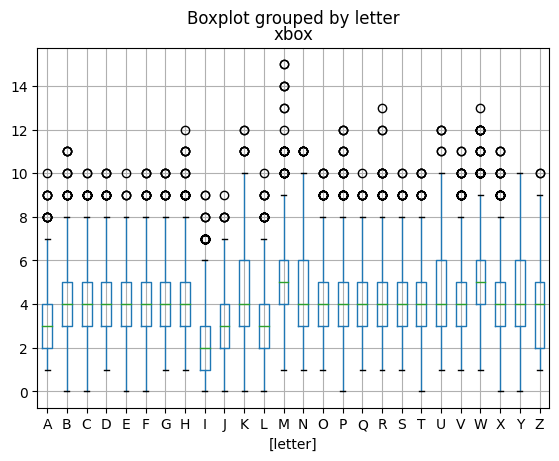

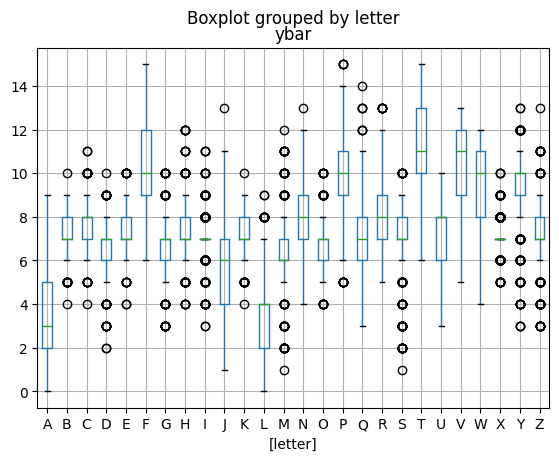

In [ ]:
ax1=letters[['xbox','letter']].boxplot(by='letter')
fig1=ax1.get_figure()
ax2=letters[['ybar','letter']].boxplot(by='letter')
fig2=ax2.get_figure()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(letters.iloc[:,1:],letters['letter'],test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_std,y_train)
tr_pred=svm.predict(X_train_std)
y_pred=svm.predict(X_test_std)
print(tr_pred[:5])

['I' 'M' 'Z' 'D' 'G']


In [ ]:
print(y_train[:5])

17815    I
18370    M
1379     Z
14763    D
7346     L
Name: letter, dtype: object


In [ ]:
print(y_pred[:5])

['Y' 'B' 'K' 'X' 'Q']


In [ ]:
print(y_test[:5].tolist())

['Y', 'B', 'K', 'Y', 'Q']


In [ ]:
err_tr=(y_train!=tr_pred).sum()/len(y_train)
print('訓練集錯誤率為:%.5f'%err_tr)

訓練集錯誤率為:0.04119


In [ ]:
svm=SVC(kernel='rbf',random_state=0,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
tr_pred=svm.predict(X_train_std)
y_pred=svm.predict(X_test_std)
print(tr_pred[:5])

['I' 'M' 'Z' 'D' 'L']


In [ ]:
print(y_train[:5])

17815    I
18370    M
1379     Z
14763    D
7346     L
Name: letter, dtype: object


In [ ]:
print(y_pred[:5])

['Y' 'B' 'K' 'X' 'Q']


In [ ]:
print(y_test[:5].tolist())

['Y', 'B', 'K', 'Y', 'Q']


In [ ]:
err_tr=(y_train.values!=tr_pred).sum()/len(y_train)
print('訓練集錯誤率為：%.5f'%err_tr)

訓練集錯誤率為：0.01175


In [ ]:
err=(y_test!=y_pred).sum()/len(y_test)
print('測試集錯誤率為:%.5f'%err)

測試集錯誤率為:0.02750


In [ ]:
pip install pandas_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import pandas_ml as pdml
##from sklearn.matrics import jaccard_similarity_score
#cm=pdml.ConfusionMatrix(y_test.values,y_pred)
#cm_df=cm.to_dataframe(normalized=False,calc_sum=True,sum_label='all')
#print(cm_df.iloc[:12, :12])

In [ ]:
import matplotlib.pyplot as plt
#ax=cm.plot()
#fig=ax.get_figure()